# This notebook contains some exploratory analysis of flight data.  Various features of the data are explored and sometimes further analysis is warrented if something interesting is found.

## Just some thoughts on the overall scope of the project, brainstorming
### look at data from 1995 and 2015 (select just July maybe)
### compare at look at in what ways airline travel has become "better"
####   Like look at flight availability, flight times, delay times, etc.
### also think about building a model to combine weather data and see if an effect can be seen
### do to global warming on flight times
### maybe correlation increase or decrease in number of airports or number of carriers per city with economic status of the city
### maybe build a graph of flight paths (departure city and arrival city) and see if interconnectness of the states has increased over time

#### Need to import pandas for data manipulation

In [1]:
import pandas as pd

C:\Users\Rich\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


#### import some data tables.  Two Excel tables were included in the project, one containing code value and description for the carriers (which is not used in this analysis) and a second table containing further information about the airports (id code, name, city, state, latitude and longitude)

In [2]:
df_airports = pd.read_excel('./data/airports_new.xlt')

In [3]:
df_airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [4]:
df_airports['iata'].unique()

array([u'00M', u'00R', u'00V', ..., u'ZPH', u'ZUN', u'ZZV'], dtype=object)

In [5]:
df_airport_codes = pd.read_csv('./data/L_AIRPORT_ID.csv-')
df_airport_codes['Description'] = df_airport_codes['Description'].apply(lambda x: x.split(':')[1].strip())
#df_airport_codes[df_airport_codes.Description=='LaGuardia']

dict_airport_codes_to_name = {}
for i in df_airport_codes[['Code','Description']].values:
    dict_airport_codes_to_name[i[0]] = i[1]

df_airport_codes = df_airport_codes.merge(df_airports,left_on='Description',right_on='airport')
df_airport_codes.head()

,Code,Description,iata,airport,city,state,country,lat,long
0,10011,Grand Canyon West,1G4,Grand Canyon West,Peach Springs,AZ,USA,35.992210,-113.816616
1,11398,Grand Canyon West,1G4,Grand Canyon West,Peach Springs,AZ,USA,35.992210,-113.816616
2,10135,Lehigh Valley International,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402
3,10136,Abilene Regional,ABI,Abilene Regional,Abilene,TX,USA,32.411320,-99.681897
4,10141,Aberdeen Regional,ABR,Aberdeen Regional,Aberdeen,SD,USA,45.449056,-98.421833


#### Produce a look up table in the form of a python dictionary to associate an airport code with the lat, long location...could be useful later.

In [6]:
dict_airport_codes = {}

for i in df_airport_codes[['Code','lat','long']].values:
    dict_airport_codes[i[0]] = ([i[1],i[2]])
    

print dict_airport_codes

{16694.0: [34.857616389999997, -102.3272017], 13995.0: [30.735280280000001, -101.20297189999999], 14344.0: [33.353147219999997, -110.66736109999999], 10254.0: [33.177810829999999, -86.783237220000004], 12306.0: [41.60844444, -88.090944440000001], 12308.0: [37.855677780000001, -81.915897220000005], 12310.0: [39.774296939999999, -90.238565829999999], 10263.0: [27.740888890000001, -98.026944439999994], 12312.0: [36.22284028, -81.0983375], 12314.0: [41.071404170000001, -87.846268609999996], 10267.0: [38.890290829999998, -90.046043060000002], 16412.0: [33.484810000000003, -101.66071580000001], 12317.0: [41.691285559999997, -93.566303329999997], 16414.0: [30.487484720000001, -89.651193059999997], 10275.0: [46.094561669999997, -118.28803670000001], 10277.0: [31.327371670000002, -92.548556110000007], 16422.0: [30.289516670000001, -87.673714720000007], 14001.0: [40.085368610000003, -78.51221778], 14378.0: [36.630748609999998, -80.018349169999993], 12332.0: [40.509305560000001, -101.6205278], 16

In [7]:
df_carriers = pd.read_excel('./data/carriers.xls')

In [8]:
df_carriers = df_carriers.dropna()
df_carriers.head()

,Code,Description
1,02Q,Titan Airways
3,04Q,Tradewind Aviation
5,05Q,"Comlux Aviation, AG"
7,06Q,Master Top Linhas Aereas Ltd.
9,07Q,Flair Airlines Ltd.


#### load up the data below.  It was chosen to focus on the month of July with data separated by 10 years (so 1995, 2005, 2015)

In [9]:
df_2015 = pd.read_csv('./data/363985671_T_ONTIME_July2015.zip')
df_2005 = pd.read_csv('./data/363985671_T_ONTIME_July2005.zip')
df_1995 = pd.read_csv('./data/363985671_T_ONTIME_July1995.zip')

In [10]:
df_2015['CARRIER']

0         AA
1         AA
2         AA
3         AA
4         AA
5         AA
6         AA
7         AA
8         AA
9         AA
10        AA
11        AA
12        AA
13        AA
14        AA
15        AA
16        AA
17        AA
18        AA
19        AA
20        AA
21        AA
22        AA
23        AA
24        AA
25        AA
26        AA
27        AA
28        AA
29        AA
          ..
520688    UA
520689    UA
520690    UA
520691    UA
520692    UA
520693    UA
520694    UA
520695    UA
520696    UA
520697    UA
520698    UA
520699    UA
520700    UA
520701    UA
520702    UA
520703    UA
520704    UA
520705    UA
520706    UA
520707    UA
520708    UA
520709    UA
520710    UA
520711    UA
520712    UA
520713    UA
520714    UA
520715    UA
520716    UA
520717    UA
Name: CARRIER, dtype: object

In [11]:
#df_2015 = pd.merge(df_2015, df_airport_codes, left_on='ORIGIN_AIRPORT_ID',right_on='Code')
#df_2015 = df_2015.rename(columns={'lat':'origin_lat', 'long':'origin_long'})
#df_2015 = pd.merge(df_2015, df_airport_codes, left_on='DEST_AIRPORT_ID',right_on='Code')
#df_2015 = df_2015.rename(columns={'lat':'dest_lat', 'long':'dest_long'})
#df_2015.head()

In [12]:
print df_2005.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'UNIQUE_CARRIER',
       u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID',
       u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR', u'DEST_STATE_NM',
       u'CRS_DEP_TIME', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'TAXI_OUT', u'WHEELS_OFF', u'WHEELS_ON', u'TAXI_IN', u'CRS_ARR_TIME',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'CRS_ELAPSED_TIME',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'DISTANCE', u'CARRIER_DELAY',
       u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'FIRST_DEP_TIME', u'TOTAL_ADD_GTIME',
       u'LONGEST_ADD_GTIME', u'Unnamed: 48'],
      dtype='object')


#### take a look at the data

In [13]:
df_1995.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 48
0,1995,7,11,2,AA,19805,AA,10279,1027901,30279,...,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,7,12,3,AA,19805,AA,10279,1027901,30279,...,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995,7,13,4,AA,19805,AA,10279,1027901,30279,...,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995,7,14,5,AA,19805,AA,10279,1027901,30279,...,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995,7,15,6,AA,19805,AA,10279,1027901,30279,...,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### look at the number of carriers as a function of time

In [14]:
numAirports_1995 = len(df_1995['UNIQUE_CARRIER'].unique())
numAirports_2005 = len(df_2005['UNIQUE_CARRIER'].unique())
numAirports_2015 = len(df_2015['UNIQUE_CARRIER'].unique())

10
20
13


<Container object of 3 artists>

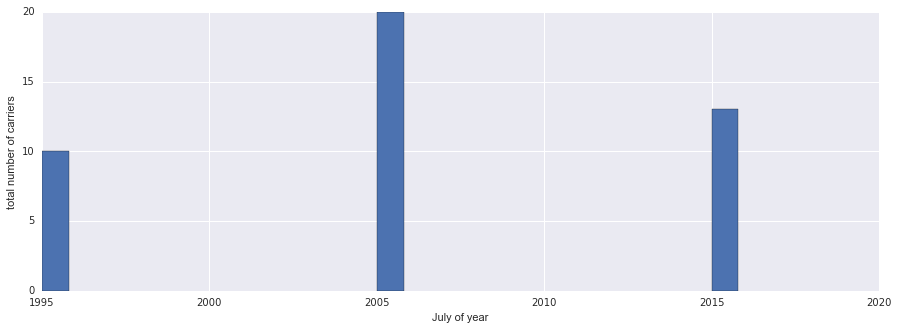

In [30]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print numAirports_1995
print numAirports_2005
print numAirports_2015

data = [numAirports_1995, numAirports_2005, numAirports_2015]
years = [1995, 2005, 2015]

plt.figure(figsize=(15,5))
plt.ylabel('total number of carriers')
plt.xlabel('July of year')
plt.bar(years,data)

#### number of airports as a function of time

206
278
312


<Container object of 3 artists>

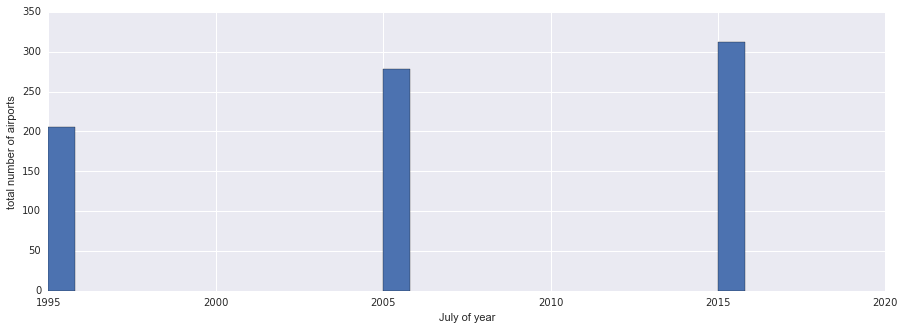

In [31]:
numAirports_1995 = len(df_1995['ORIGIN_AIRPORT_ID'].unique())
numAirports_2005 = len(df_2005['ORIGIN_AIRPORT_ID'].unique())
numAirports_2015 = len(df_2015['ORIGIN_AIRPORT_ID'].unique())

print numAirports_1995
print numAirports_2005
print numAirports_2015

data = [numAirports_1995, numAirports_2005, numAirports_2015]
years = [1995, 2005, 2015]

plt.figure(figsize=(15,5))
plt.ylabel('total number of airports')
plt.xlabel('July of year')
plt.bar(years,data)

#### look at the number of flights as a function of time

449856
627961
520718


<Container object of 3 artists>

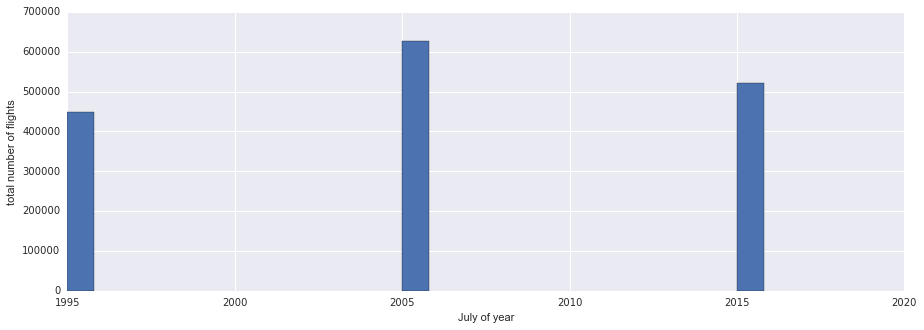

In [32]:
numAirports_1995 = len(df_1995)
numAirports_2005 = len(df_2005)
numAirports_2015 = len(df_2015)

print numAirports_1995
print numAirports_2005
print numAirports_2015

data = [numAirports_1995, numAirports_2005, numAirports_2015]
years = [1995, 2005, 2015]

plt.figure(figsize=(15,5))
plt.ylabel('total number of flights')
plt.xlabel('July of year')
plt.bar(years,data)

#### normalize the number of flights per number of airports and see how that changes with time.

2183
2258
1668


<Container object of 3 artists>

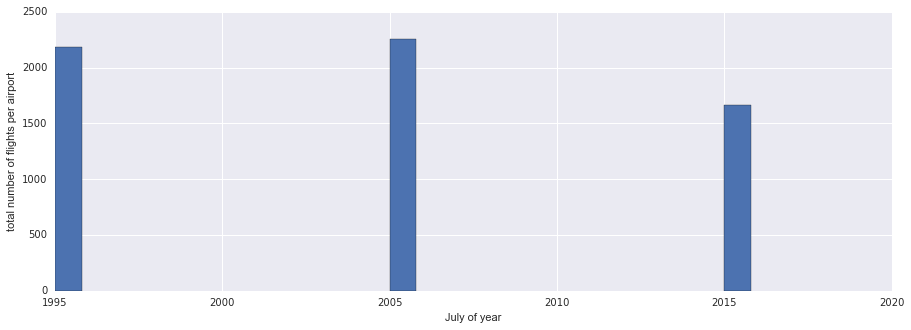

In [72]:
numAirports_1995 = len(df_1995)//len(df_1995['ORIGIN_AIRPORT_ID'].unique())
numAirports_2005 = len(df_2005)//len(df_2005['ORIGIN_AIRPORT_ID'].unique())
numAirports_2015 = len(df_2015)//len(df_2015['ORIGIN_AIRPORT_ID'].unique())

print numAirports_1995
print numAirports_2005
print numAirports_2015

data = [numAirports_1995, numAirports_2005, numAirports_2015]
years = [1995, 2005, 2015]

plt.figure(figsize=(15,5))
plt.ylabel('total number of flights per airport')
plt.xlabel('July of year')
plt.bar(years,data)

#### Now we start to look at the number of flights going to each destination airport

In [17]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

 #### some cleaning of the data is needed.  The "state" below did not have any flights in 1995, so some care needs to be taken so that overlay plots line up correctly on the horizontal axis

In [46]:
df_by_state_1995 = df_1995.groupby('DEST_STATE_NM')['YEAR'].count()
df_by_state_2005 = df_2005.groupby('DEST_STATE_NM')['YEAR'].count()
df_by_state_2015 = df_2015.groupby('DEST_STATE_NM')['YEAR'].count()

df_by_state_2005['U.S. Pacific Trust Territories and Possessions'] = 0

print len(df_by_state_1995)
print len(df_by_state_2005)
print len(df_by_state_2015)

print df_by_state_2005


52
52
52
DEST_STATE_NM
Alabama                                            3914
Alaska                                             4816
Arizona                                           16546
Arkansas                                           3167
California                                        72170
Colorado                                          20145
Connecticut                                        3306
Florida                                           39074
Georgia                                           39684
Hawaii                                             6424
Idaho                                              2578
Illinois                                          38022
Indiana                                            5208
Iowa                                               1793
Kansas                                              844
Kentucky                                          21740
Louisiana                                          6783
Maine                    

In [42]:
in05 = df_by_state_2005.index
in95 = df_by_state_1995.index

print df_by_state_2005[df_by_state_2005.index=='U.S. Pacific Trust Territories and Possessions']

for i in xrange(0,len(in05)):
    if in05[i] != in95[i]:
        print in95[i]

Series([], Name: YEAR, dtype: int64)
U.S. Pacific Trust Territories and Possessions
U.S. Virgin Islands
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin


#### now we compare the number of flights to each state as a function of year.  The idea here is to observe states that are either up and coming or in decline.  Some more details can be found in the associated report.

52


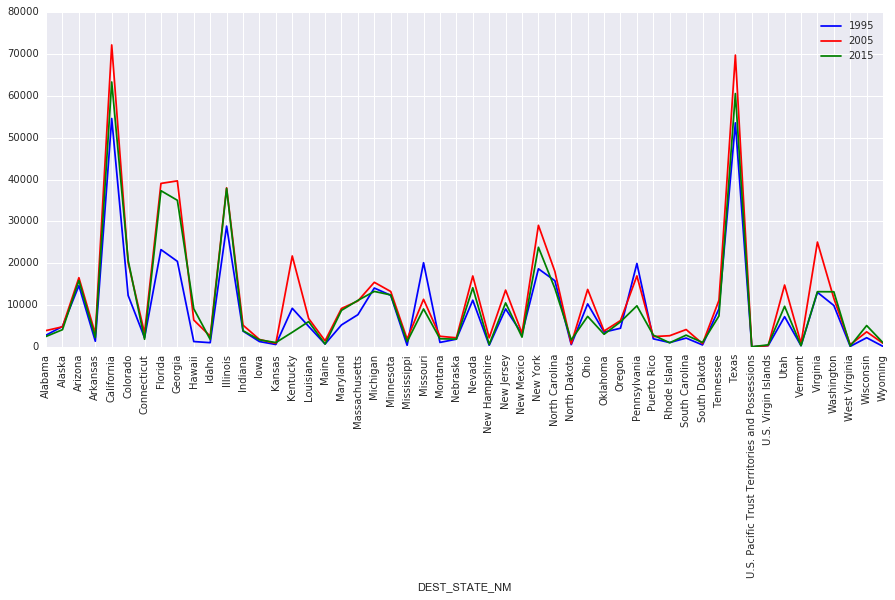

In [47]:
plt.figure(figsize=(15,6))

df_by_state_1995.sort_index().plot(c='b',label='1995',use_index='True',xticks=[i for i in xrange(52)])
df_by_state_2005.sort_index().plot(c='r',label="2005",sharex='True')
df_by_state_2015.sort_index().plot(c='g',label="2015",sharex='True')

plt.legend()
plt.xticks(rotation='vertical')

print len(df_by_state_1995.index)


#### Here we take a closer look at the incresed number of flights to Florida after 1995.  We look at flights going to each airport within Florida for each year below.

In [143]:
df_by_state_2015 = df_2015[df_2015.DEST_STATE_NM=='Florida'].groupby('DEST_CITY_NAME')['YEAR'].count()
#df_2015.columns
df_by_state_2015

DEST_CITY_NAME
Daytona Beach, FL                   149
Fort Lauderdale, FL                6444
Fort Myers, FL                     1709
Gainesville, FL                     243
Jacksonville, FL                   1747
Key West, FL                        157
Melbourne, FL                       132
Miami, FL                          6390
Orlando, FL                       10514
Panama City, FL                     490
Pensacola, FL                       749
Sarasota/Bradenton, FL              241
St. Augustine, FL                    13
Tallahassee, FL                     284
Tampa, FL                          5852
Valparaiso, FL                      540
West Palm Beach/Palm Beach, FL     1681
Name: YEAR, dtype: int64

In [144]:
df_by_state_2005 = df_2005[df_2005.DEST_STATE_NM=='Florida'].groupby('DEST_CITY_NAME')['YEAR'].count()
#df_2015.columns
df_by_state_2005
df_by_state_2005

DEST_CITY_NAME
Daytona Beach, FL                   340
Fort Lauderdale, FL                5783
Fort Myers, FL                     1830
Gainesville, FL                     216
Jacksonville, FL                   2604
Key West, FL                         96
Melbourne, FL                       336
Miami, FL                          5704
Naples, FL                           93
Orlando, FL                       10202
Panama City, FL                     288
Pensacola, FL                      1058
Sarasota/Bradenton, FL              562
Tallahassee, FL                     495
Tampa, FL                          6703
Valparaiso, FL                      683
West Palm Beach/Palm Beach, FL     2081
Name: YEAR, dtype: int64

In [145]:
df_by_state_1995 = df_1995[df_1995.DEST_STATE_NM=='Florida'].groupby('DEST_CITY_NAME')['YEAR'].count()
#df_2015.columns
df_by_state_1995

DEST_CITY_NAME
Daytona Beach, FL                  340
Fort Lauderdale, FL               2521
Fort Myers, FL                     996
Gainesville, FL                    122
Jacksonville, FL                  1398
Melbourne, FL                      246
Miami, FL                         5847
Orlando, FL                       5291
Panama City, FL                    122
Pensacola, FL                      573
Sarasota/Bradenton, FL             499
Tallahassee, FL                    331
Tampa, FL                         3398
Valparaiso, FL                      93
West Palm Beach/Palm Beach, FL    1485
Name: YEAR, dtype: int64

#### now we summarize the above data in a plot.

([<matplotlib.axis.XTick at 0x10edbc50>,
 <a list of 18 Text xticklabel objects>)

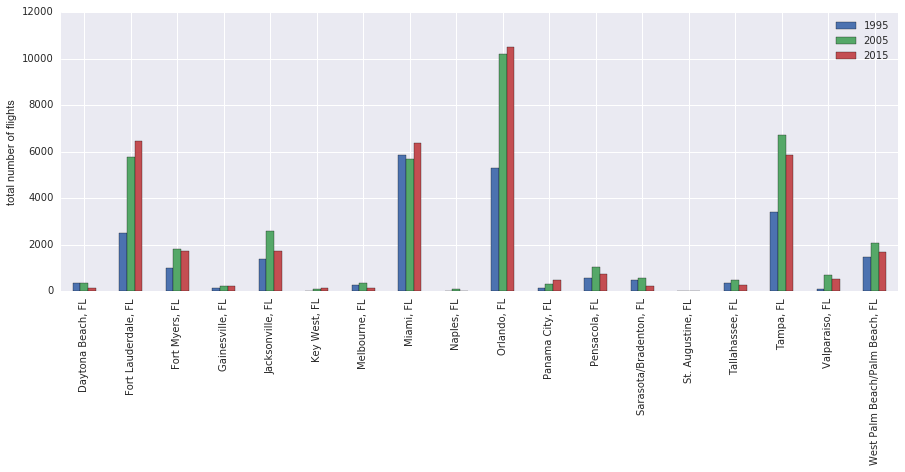

In [159]:
plt.figure(figsize=(15,5))
temp = pd.concat([df_by_state_1995,df_by_state_2005,df_by_state_2015],axis=1)
temp.columns = ['1995','2005','2015']
temp.head()
temp.plot(kind='bar',figsize=(15,5))
plt.xticks(rotation='vertical')
plt.ylabel('total number of flights')
plt.xticks(range(len(temp)),temp.index)

In [135]:
sorted(df_1995[df_1995.DEST_STATE_NM=='Florida'].DEST_CITY_NAME.unique())

['Daytona Beach, FL',
 'Fort Lauderdale, FL',
 'Fort Myers, FL',
 'Gainesville, FL',
 'Jacksonville, FL',
 'Melbourne, FL',
 'Miami, FL',
 'Orlando, FL',
 'Panama City, FL',
 'Pensacola, FL',
 'Sarasota/Bradenton, FL',
 'Tallahassee, FL',
 'Tampa, FL',
 'Valparaiso, FL',
 'West Palm Beach/Palm Beach, FL']

#### look at the maximum and minimum flight distance over time

In [20]:
print df_1995['DISTANCE'].max()
print df_2005['DISTANCE'].max()
print df_2015['DISTANCE'].max()

4502.0
4962.0
4983.0


In [21]:
print df_1995['DISTANCE'].min()
print df_2005['DISTANCE'].min()
print df_2015['DISTANCE'].min()

21.0
31.0
31.0


#### Here we start to look into how the mean trip time for each flight path changes with time.  The basic idea is to see if flights get shorter since planes presumably are being better designed and may be faster now than in the past.

In [48]:
df_meanTripTime_byPath_1995 = df_1995.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['ACTUAL_ELAPSED_TIME'].mean()
df_meanTripTime_byPath_1995 = df_meanTripTime_byPath_1995.rename(columns={'ACTUAL_ELAPSED_TIME':'ACTUAL_ELAPSED_TIME_1995'})
df_meanTripTime_byPath_2005 = df_2005.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['ACTUAL_ELAPSED_TIME'].mean()
df_meanTripTime_byPath_2005 = df_meanTripTime_byPath_2005.rename(columns={'ACTUAL_ELAPSED_TIME':'ACTUAL_ELAPSED_TIME_2005'})
df_meanTripTime_byPath_2015 = df_2015.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['ACTUAL_ELAPSED_TIME'].mean()
df_meanTripTime_byPath_2015 = df_meanTripTime_byPath_2015.rename(columns={'ACTUAL_ELAPSED_TIME':'ACTUAL_ELAPSED_TIME_2015'})

In [49]:
print df_meanTripTime_byPath_2015

      ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  ACTUAL_ELAPSED_TIME_2015
0                 10135            10397                119.655172
1                 10135            11433                 97.514286
2                 10135            13930                126.906667
3                 10136            11298                 54.057143
4                 10140            10397                178.847826
5                 10140            10821                218.843750
6                 10140            11057                192.741935
7                 10140            11259                 96.506667
8                 10140            11292                 73.352941
9                 10140            11298                104.043243
10                10140            12191                119.400000
11                10140            12266                130.181818
12                10140            12478                235.096774
13                10140            12889                 85.39

In [50]:
df_sdTripTime_byPath_1995 = df_1995.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])['ACTUAL_ELAPSED_TIME'].std()
df_sdTripTime_byPath_2005 = df_2005.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])['ACTUAL_ELAPSED_TIME'].std()
df_sdTripTime_byPath_2015 = df_2015.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])['ACTUAL_ELAPSED_TIME'].std()

In [51]:
temp = pd.merge(df_meanTripTime_byPath_1995, df_meanTripTime_byPath_2005, on=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])

In [52]:
temp = pd.merge(temp, df_meanTripTime_byPath_2015, on=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])

In [55]:
print type(temp)
temp.head()

<class 'pandas.core.frame.DataFrame'>


,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ACTUAL_ELAPSED_TIME_1995,ACTUAL_ELAPSED_TIME_2005,ACTUAL_ELAPSED_TIME_2015
0,10135,10397,118.622951,127.899083,119.655172
1,10135,11433,89.461538,91.000000,97.514286
2,10140,10397,174.129032,187.159664,178.847826
3,10140,11259,90.570652,94.260116,96.506667
4,10140,11292,69.553719,74.554167,73.352941


#### trying different ways to visualize the difference in average flight time over the  years...the one directly below is not so helpful, but the histogram below that is a bit more illuminating.

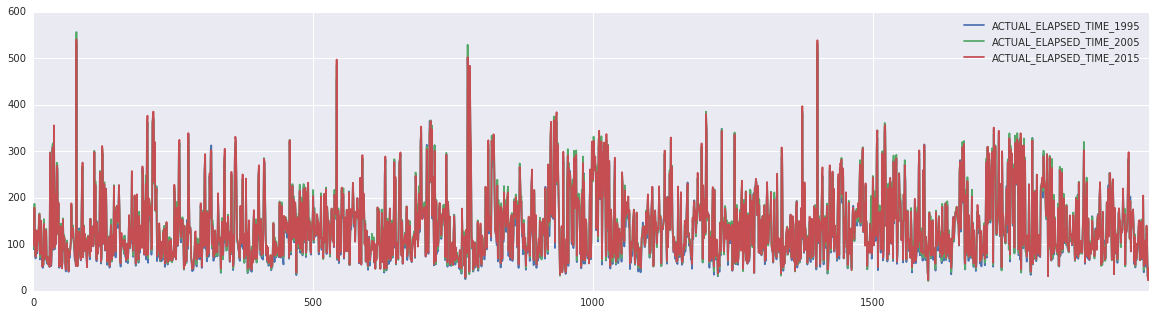

In [65]:
temp[['ACTUAL_ELAPSED_TIME_1995','ACTUAL_ELAPSED_TIME_2005','ACTUAL_ELAPSED_TIME_2015']].plot(use_index=True,figsize=(20,5))

In [68]:
df_meanAirTime_byPath_1995 = df_1995.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['AIR_TIME'].mean()
df_meanAirTime_byPath_1995 = df_meanAirTime_byPath_1995.rename(columns={'AIR_TIME':'AIR_TIME_1995'})
df_meanAirTime_byPath_2005 = df_2005.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['AIR_TIME'].mean()
df_meanAirTime_byPath_2005 = df_meanAirTime_byPath_2005.rename(columns={'AIR_TIME':'AIR_TIME_2005'})
df_meanAirTime_byPath_2015 = df_2015.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['AIR_TIME'].mean()
df_meanAirTime_byPath_2015 = df_meanAirTime_byPath_2015.rename(columns={'AIR_TIME':'AIR_TIME_2015'})

df_stdAirTime_byPath_1995 = df_1995.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['AIR_TIME'].std()
#df_stdAirTime_byPath_1995 = df_stdAirTime_byPath_1995.rename(columns={'AIR_TIME':'AIR_TIME_std_1995'})
df_stdAirTime_byPath_2005 = df_2005.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['AIR_TIME'].std()
df_stdAirTime_byPath_2005 = df_stdAirTime_byPath_2005.rename(columns={'AIR_TIME':'AIR_TIME_std_2005'})
df_stdAirTime_byPath_2015 = df_2015.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'], as_index=False)['AIR_TIME'].std()
df_stdAirTime_byPath_2015 = df_stdAirTime_byPath_2015.rename(columns={'AIR_TIME':'AIR_TIME_std_2015'})

In [69]:
temp = pd.merge(df_meanAirTime_byPath_1995, df_meanAirTime_byPath_2005, on=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])
temp = pd.merge(temp, df_meanAirTime_byPath_2015, on=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])
#temp = pd.merge(temp, df_stdAirTime_byPath_1995, on=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])
#temp = pd.merge(temp, df_stdAirTime_byPath_2005, on=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])
#temp = pd.merge(temp, df_stdAirTime_byPath_2015, on=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'])

In [70]:
print df_meanAirTime_byPath_1995
print df_stdAirTime_byPath_1995

      ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  AIR_TIME_1995
0                 10135            10397     101.344262
1                 10135            11057      72.915254
2                 10135            11193      81.464286
3                 10135            11433      72.384615
4                 10135            13230      19.000000
5                 10135            13930      97.330508
6                 10135            14122      43.389831
7                 10140            10279      42.483871
8                 10140            10397     153.193548
9                 10140            11109      40.774194
10                10140            11193     148.967742
11                10140            11259      79.266304
12                10140            11292      53.450413
13                10140            11298      78.629032
14                10140            11540      36.547945
15                10140            12266     100.811688
16                10140            12889      68

1411
1292
-1.70562477051
-1.34026161394


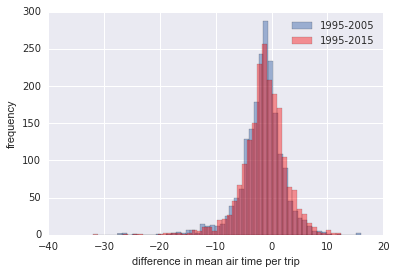

In [92]:
print len(temp[temp.AIR_TIME_1995 - temp.AIR_TIME_2005 < 0])
data =  [temp.apply(lambda x: temp.AIR_TIME_1995 - temp.AIR_TIME_2005)['AIR_TIME_1995'].values]
plt.hist(data,bins=50,alpha=0.5,label='1995-2005')

print len(temp[temp.AIR_TIME_1995 - temp.AIR_TIME_2015 < 0])
data2 =  [temp.apply(lambda x: temp.AIR_TIME_1995 - temp.AIR_TIME_2015)['AIR_TIME_1995'].values]
plt.hist(data2,bins=50,color='r',alpha=0.4,label='1995-2015')

plt.ylabel('frequency')
plt.xlabel('difference in mean air time per trip')
plt.legend()

print np.mean(data)
print np.mean(data2)

In [32]:
print len(temp[temp.AIR_TIME_1995 - temp.AIR_TIME_2005 >= 0])

584


1292


(array([   1.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    1.,
           1.,    0.,    0.,    0.,    1.,    2.,    2.,    2.,    3.,
           1.,    3.,    7.,    5.,   11.,   11.,    5.,   20.,   21.,
          26.,   45.,   67.,   95.,  127.,  150.,  229.,  256.,  208.,
         189.,  170.,  105.,   64.,   60.,   34.,   28.,   16.,   11.,
           4.,    2.,    6.,    2.,    3.]),
 array([-32.001998  , -31.11170945, -30.22142091, -29.33113236,
        -28.44084381, -27.55055526, -26.66026672, -25.76997817,
        -24.87968962, -23.98940107, -23.09911253, -22.20882398,
        -21.31853543, -20.42824688, -19.53795834, -18.64766979,
        -17.75738124, -16.86709269, -15.97680415, -15.0865156 ,
        -14.19622705, -13.3059385 , -12.41564995, -11.52536141,
        -10.63507286,  -9.74478431,  -8.85449576,  -7.96420722,
         -7.07391867,  -6.18363012,  -5.29334157,  -4.40305303,
         -3.51276448,  -2.62247593,  -1.73218738,  -0.84189884,
          0.04838971,   

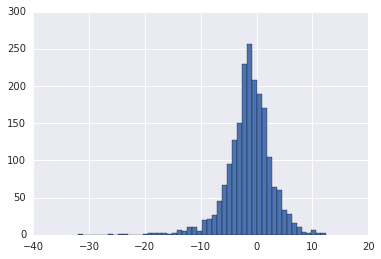

In [94]:
print len(temp[temp.AIR_TIME_1995 - temp.AIR_TIME_2015 < 0])
data =  [temp.apply(lambda x: temp.AIR_TIME_1995 - temp.AIR_TIME_2015)['AIR_TIME_1995'].values]
plt.hist(data,bins=50)

In [95]:
adict_1995 = {}
adict_2005 = {}
adict_2015 = {}

In [96]:
for i in df_1995[['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID']].values:
    try:
        adict_1995[(min(i[0],i[1]),max(i[0],i[1]))] += 1
    except KeyError:
        adict_1995[(min(i[0],i[1]),max(i[0],i[1]))] = 1
        
for i in df_2005[['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID']].values:
    try:
        adict_2005[(min(i[0],i[1]),max(i[0],i[1]))] += 1
    except KeyError:
        adict_2005[(min(i[0],i[1]),max(i[0],i[1]))] = 1
        
for i in df_2015[['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID']].values:
    try:
        adict_2015[(min(i[0],i[1]),max(i[0],i[1]))] += 1
    except KeyError:
        adict_2015[(min(i[0],i[1]),max(i[0],i[1]))] = 1

In [97]:
print adict_2005

{(11193, 15249): 124, (11066, 11618): 323, (12478, 15024): 62, (11298, 11995): 246, (10423, 12889): 186, (11884, 13487): 184, (10140, 13796): 124, (10397, 14685): 849, (11433, 11618): 808, (11618, 15370): 100, (12402, 13830): 31, (10721, 13577): 40, (10800, 14869): 247, (11298, 13061): 280, (10785, 12478): 186, (10529, 14100): 659, (11618, 12264): 905, (10397, 12278): 406, (13487, 15016): 310, (10299, 11336): 72, (11042, 14771): 122, (11109, 14771): 124, (11193, 11721): 246, (11066, 11193): 430, (11042, 11066): 213, (10721, 14869): 123, (11298, 11986): 186, (10423, 11618): 108, (11003, 13930): 658, (10397, 13367): 186, (10397, 11150): 298, (12992, 13244): 186, (13891, 14747): 248, (13303, 15024): 124, (13495, 13930): 301, (11618, 15016): 274, (11292, 11637): 247, (12478, 13360): 124, (12889, 14869): 892, (10821, 11298): 614, (11540, 14679): 62, (11298, 14524): 186, (10397, 15624): 525, (11618, 14730): 172, (11884, 13930): 62, (11996, 12953): 124, (10397, 13360): 404, (10397, 11612): 31

#### Now we build a network of flight paths to do some graph type analysis and look for important hubs.  Build a separate graph for each year to compare.  The vertices are the airports in the flight path and the edge weight is the number of flights on that path.

In [98]:
import networkx as nx

In [99]:
G_1995 = nx.Graph()
G_2005 = nx.Graph()
G_2015 = nx.Graph()

for key in adict_1995.keys():
    names = key
    G_1995.add_edge(names[0], names[1], weight=adict_1995[names])
    
for key in adict_2005.keys():
    names = key
    G_2005.add_edge(names[0], names[1], weight=adict_2005[names])
    
for key in adict_2015.keys():
    names = key
    G_2015.add_edge(names[0], names[1], weight=adict_2015[names])

#### calculate the average node connectivity and compare over the years.

In [100]:
print nx.average_node_connectivity(G_1995)
#print nx.degree(G_2005)
#print nx.degree(G_2015)

4.66441536513


In [101]:
print nx.average_node_connectivity(G_2005)
print nx.average_node_connectivity(G_2015)

4.3750097395
3.6645436557


#### Try to visualize the network, still a work in progress, this is not so useful at the moment.

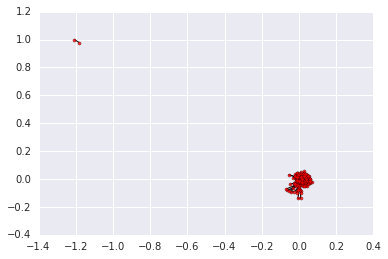

In [102]:
pos=nx.spring_layout(G_1995)

# Draw the nodes and edges.
nx.draw_networkx_nodes(G_1995,pos, node_color='red', node_size=10, alpha=0.8)
nx.draw_networkx_edges(G_1995,pos,width=1.0,alpha=1)

# Show the plot.
#plt.ylim((-1,1))
plt.show()

#### calculate the relative importance of each airport in the network via the pagerank.   The distribution becomes much more smooth over time, possibly an idication of flight loads being more spread out due to increased number of airports.

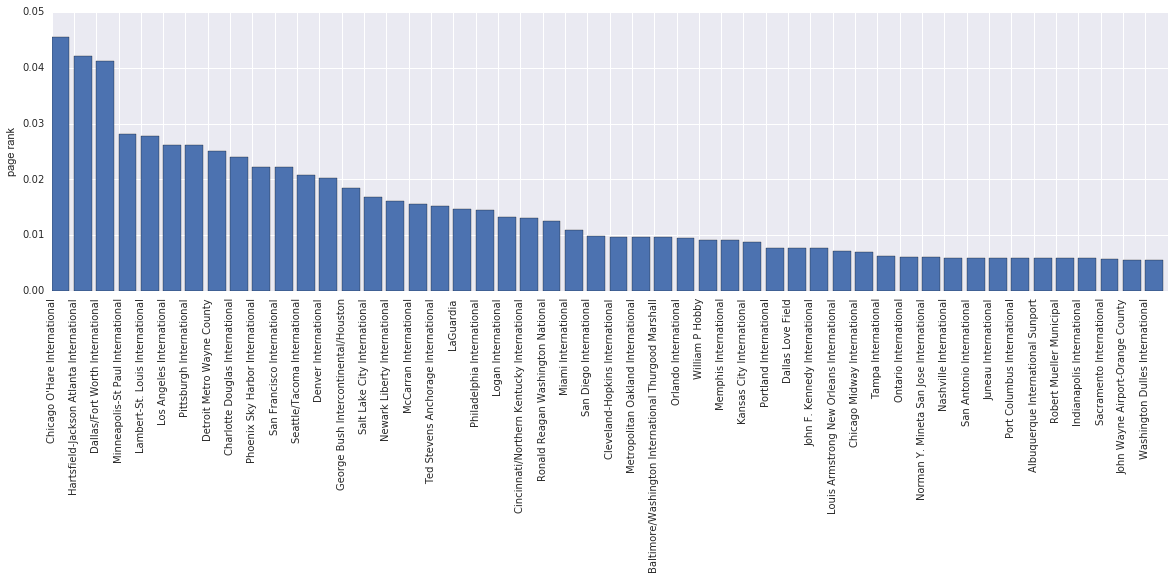

In [113]:
pagerank_dict = nx.pagerank(G_1995, alpha=0.85)
sorted_dict = sorted(pagerank_dict.items(),key=lambda x: x[1], reverse=True)[:50]
count = 0
for i in xrange(0,len(sorted_dict)):
    try:
        sorted_dict[i] = (dict_airport_codes_to_name[sorted_dict[i][0]],sorted_dict[i][1])
    except KeyError:
        count += 1
#print count
#print sorted_dict
zip(*sorted_dict)
plt.figure(figsize=(20,5))
plt.bar(range(len(zip(*sorted_dict)[1])),zip(*sorted_dict)[1])
plt.xticks(range(len(zip(*sorted_dict)[1])),zip(*sorted_dict)[0])
plt.xticks(rotation='vertical')
plt.ylabel('page rank')
plt.show()

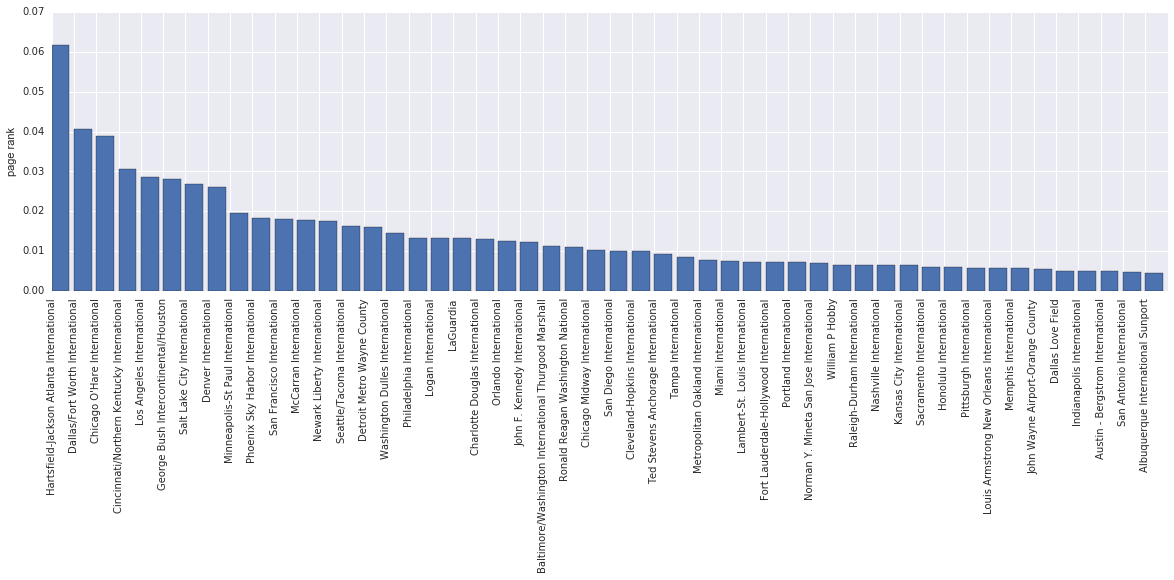

In [114]:
pagerank_dict = nx.pagerank(G_2005, alpha=0.85)
sorted_dict = sorted(pagerank_dict.items(),key=lambda x: x[1], reverse=True)[:50]
count = 0
for i in xrange(0,len(sorted_dict)):
    try:
        sorted_dict[i] = (dict_airport_codes_to_name[sorted_dict[i][0]],sorted_dict[i][1])
    except KeyError:
        count += 1
#print count
#print sorted_dict
zip(*sorted_dict)
plt.figure(figsize=(20,5))
plt.bar(range(len(zip(*sorted_dict)[1])),zip(*sorted_dict)[1])
plt.xticks(range(len(zip(*sorted_dict)[1])),zip(*sorted_dict)[0])
plt.xticks(rotation='vertical')
plt.ylabel('page rank')
plt.show()

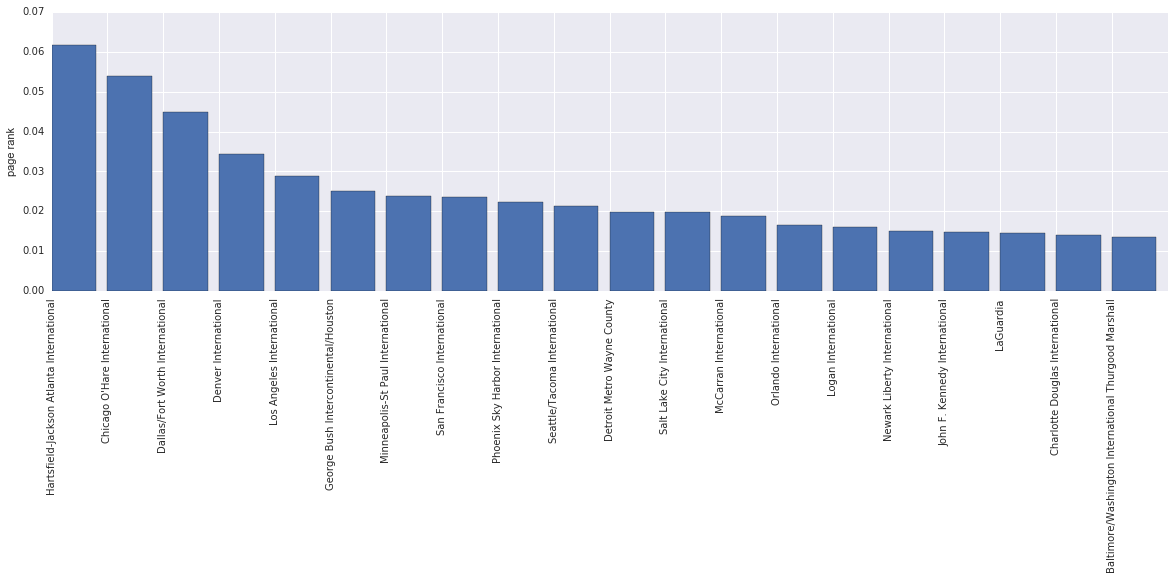

In [115]:
pagerank_dict = nx.pagerank(G_2015, alpha=0.85)
sorted_dict = sorted(pagerank_dict.items(),key=lambda x: x[1], reverse=True)[:20]
count = 0
for i in xrange(0,len(sorted_dict)):
    try:
        sorted_dict[i] = (dict_airport_codes_to_name[sorted_dict[i][0]],sorted_dict[i][1])
    except KeyError:
        count += 1
#print count
#print sorted_dict
zip(*sorted_dict)
plt.figure(figsize=(20,5))
plt.bar(range(len(zip(*sorted_dict)[1])),zip(*sorted_dict)[1])
plt.xticks(range(len(zip(*sorted_dict)[1])),zip(*sorted_dict)[0])
plt.xticks(rotation='vertical')
plt.ylabel('page rank')
plt.show()

In [104]:
df_1995.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'UNIQUE_CARRIER',
       u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID',
       u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR', u'DEST_STATE_NM',
       u'CRS_DEP_TIME', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'TAXI_OUT', u'WHEELS_OFF', u'WHEELS_ON', u'TAXI_IN', u'CRS_ARR_TIME',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'CRS_ELAPSED_TIME',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'DISTANCE', u'CARRIER_DELAY',
       u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'FIRST_DEP_TIME', u'TOTAL_ADD_GTIME',
       u'LONGEST_ADD_GTIME', u'Unnamed: 48'],
      dtype='object')

#### start looking into flight delays, more on this in the weather_and_delays notebook.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017CD4B38>]], dtype=object)

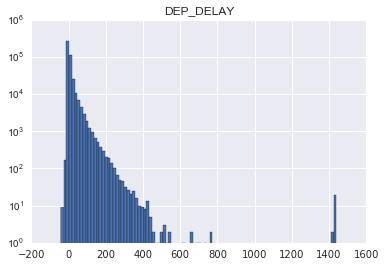

In [105]:
df_1995.hist('DEP_DELAY',bins=100,log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017DB3358>]], dtype=object)

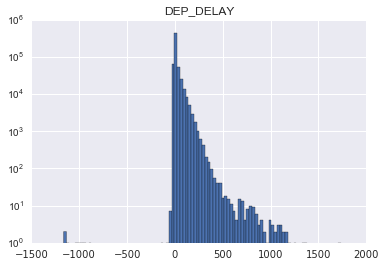

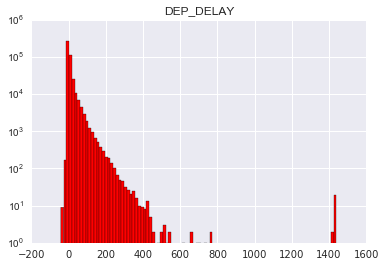

In [106]:
df_2005.hist('DEP_DELAY',bins=100,log=True,stacked=True)
df_1995.hist('DEP_DELAY',bins=100,log=True,color='red',stacked=True)

Float64Index([   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,    9.0,
              ...
               526.0,  402.0,  533.0,  534.0,  537.0,  540.0,  541.0,  542.0,
               546.0, 1625.0],
             dtype='float64', length=617)
[29841 14557 11087  9649  8517  7958  7178  6371  6112  5584  5155  4822
  4579  4260  3906  3773  3474  3352  3132  3024  2894  2575  2504  2384
  2316  2216  2095  2005  1989  1908  1883  1787  1633  1558  1464  1428
  1387  1386  1340  1327  1259  1176  1171  1112  1098  1094  1019   980
   974   937   912   898   897   831   827   814   780   769   754   728
   704   686   683   672   634   634   603   591   587   585   531   518
   517   514   505   503   478   475   462   452   449   438   426   419
   415   404   398   391   383   380   366   346   338   335   333   329
   320   320   318   309   304   287   283   280   278   278   266   258
   251   245   244   241   240   230   221   221   215   213   211

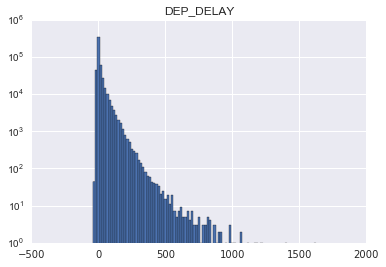

In [107]:
temphist = df_2015.hist('DEP_DELAY',bins=100,log=True)
y = df_2015['DEP_DELAY'][df_2015.DEP_DELAY>=0].value_counts().values
x = df_2015['DEP_DELAY'][df_2015.DEP_DELAY>=0].value_counts().index
print x
print y

#### below is an attempt to characterize the distribution of flight delay times in each year to look for noticable differences in the frequency and magnitude of flight delays.  This investigation was started, but put on hold to look at other things...this would be interesting to re-visit though.

#### in retrospect, this was a silly thing to do.  The distribution is clearly not exponential, as an exponential will look like a straight line on a log-scale plot.  Can try this with a power law in the future (which is quite similiar to particle emission distributions in the nuclear physics experiments at RHIC.

In [108]:
from scipy.stats import expon
from scipy.optimize import curve_fit

In [109]:
def power(x, *p):
    A, k = p
    return A*x**k

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1.e5, -1]

coeff, var_matrix = curve_fit(power, x, y, p0=p0)

# Get the fitted curve
hist_fit = power(x, *coeff)

plt.bar(x, y, label='Test data',log=True)
plt.plot(x, hist_fit, label='Fitted data',c='g')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
#print 'Fitted mean = ', coeff[1]
#print 'Fitted standard deviation = ', coeff[2]
print coeff[0]
print coeff[1]

plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [ ]:
mean, var, skew, kurt = expon.fit(temphist)

#### look into the defunct airlines and the raw number of them as a function of time, data table obtained by wikipedia

In [160]:
defunct_df = pd.read_csv('./data/defunct_airlines.csv')

In [161]:
defunct_df.head()

,Airline,State,Image,IATA,ICAO,Callsign,Commenced,Ceased,Notes
0,AAXICO,Florida,NaN,NaN,NaN,NaN,1946,1966,Sold to Saturn Airways
1,AccessAir,Iowa,NaN,ZA,CYD,Cyclone,1998,2001,NaN
2,Aero Commuter,Florida,NaN,NaN,NaN,NaN,1967,NaN,NaN
3,Aero Union (Aero Union Corporation),California,NaN,NaN,NaN,NaN,1961,2011,NaN
4,Aero Virgin Islands,United States Virgin Islands,NaN,NaN,NaN,NaN,1977,1990,NaN


C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


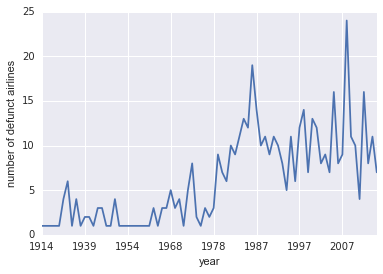

In [176]:
defunct_df[defunct_df.Ceased!='952'][defunct_df.Ceased!='950'][defunct_df.Ceased!='?'].dropna(subset=['Ceased']).groupby('Ceased')['Airline'].count().plot()
plt.ylabel("number of defunct airlines")
plt.xlabel("year")

In [174]:
defunct_df.Ceased.unique()

array(['1966', '2001', nan, '2011', '1990', '1982', '1924', '1983', '1976',
       '1987', '1980', '1981', '1979', '1980s', '1986', '1984', '1985',
       '1989', '1995', '2008', '1998', '1988', '?', '1978', '1997', '2005',
       '2004', '1970', '2003', '1991', '2014', '1999', '1939', '1949',
       '952', '1945', '1971', '2000', '950', '2009', '2010', '1996',
       '1950', '1972', '2012', '2006', '1993', '1932', '1946', '1930',
       '1968', '1992', '2013', '1954', '1961', '1973', '2007', '1969',
       '2002', '1967', '1953', '1956', '1994', '1962', '2015', '1927',
       '1974', '1970s', '1975', '1929', '1934', '1952', '1937', '1928',
       '1941', '1948', '1955', '1965', '1926', '1958', '1914', '1944',
       '1960'], dtype=object)

#### look at the fraction of delayed flight throughout the years, with departure or arrival related delays listed separately

In [192]:
print float(len(df_1995[df_1995.DEP_DELAY>0]))/float(len(df_1995))
print float(len(df_2005[df_2005.DEP_DELAY>0]))/float(len(df_2005))
print float(len(df_2015[df_2015.DEP_DELAY>0]))/float(len(df_2015))

0.487824992887
0.428351442207
0.40255762236


In [194]:
print float(len(df_1995[df_1995.ARR_DELAY>0]))/float(len(df_1995))
print float(len(df_2005[df_2005.ARR_DELAY>0]))/float(len(df_2005))
print float(len(df_2015[df_2015.ARR_DELAY>0]))/float(len(df_2015))

0.483568075117
0.482799091026
0.383541571446


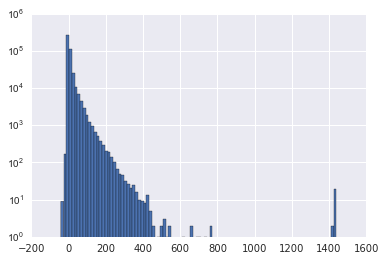

In [182]:
df_1995['DEP_DELAY'].hist(bins=100,log=True)